# Importing the Relevant Libraries

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

# Data Inspection

In [2]:
train = pd.read_excel("Final_Train.xlsx")
test = pd.read_excel("Final_Test.xlsx")

In [3]:
train

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250
...,...,...,...,...,...,...,...
5956,"MBBS, MS - ENT",19 years experience,98%,"Basavanagudi, Bangalore",ENT Specialist,"98% 45 Feedback Basavanagudi, Bangalore",300
5957,MBBS,33 years experience,NaN,"Nungambakkam, Chennai",General Medicine,NaN,100
5958,MBBS,41 years experience,97%,"Greater Kailash Part 2, Delhi",General Medicine,"97% 11 Feedback Greater Kailash Part 2, Delhi",600
5959,"MBBS, MD - General Medicine",15 years experience,90%,"Vileparle West, Mumbai",General Medicine,General Medical Consultation Viral Fever Treat...,100


In [4]:
test

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info
0,MBBS,35 years experience,NaN,"Ghatkopar East, Mumbai",General Medicine,NaN
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31 years experience,NaN,"West Marredpally, Hyderabad",ENT Specialist,NaN
2,"MBBS, DDVL",40 years experience,70%,"KK Nagar, Chennai",Dermatologists,"70% 4 Feedback KK Nagar, Chennai"
3,BAMS,0 years experience,NaN,"New Ashok Nagar, Delhi",Ayurveda,NaN
4,"BDS, MDS - Conservative Dentistry & Endodontics",16 years experience,100%,"Kanakpura Road, Bangalore",Dentist,General Dentistry Conservative Dentistry Cosme...
...,...,...,...,...,...,...
1982,"BAMS, Doctor of Medicine",10 years experience,NaN,"Basavanagudi, Bangalore",Ayurveda,NaN
1983,"MD - Dermatology , Venereology & Leprosy, MBBS",4 years experience,NaN,"Choolai, Chennai",Dermatologists,NaN
1984,"MBBS, MD / MS - Obstetrics & Gynaecology",9 years experience,NaN,"Porur, Chennai",General Medicine,NaN
1985,BDS,12 years experience,98%,"Arekere, Bangalore",Dentist,RCT - Root Canal Treatment Root Canal Treatmen...


In [5]:
train= train.drop(['Miscellaneous_Info'], axis = 1)
test= test.drop(['Miscellaneous_Info'], axis=1)

In [6]:
train

,Qualification,Experience,Rating,Place,Profile,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,300
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,250
...,...,...,...,...,...,...
5956,"MBBS, MS - ENT",19 years experience,98%,"Basavanagudi, Bangalore",ENT Specialist,300
5957,MBBS,33 years experience,NaN,"Nungambakkam, Chennai",General Medicine,100
5958,MBBS,41 years experience,97%,"Greater Kailash Part 2, Delhi",General Medicine,600
5959,"MBBS, MD - General Medicine",15 years experience,90%,"Vileparle West, Mumbai",General Medicine,100


In [7]:
test

,Qualification,Experience,Rating,Place,Profile
0,MBBS,35 years experience,NaN,"Ghatkopar East, Mumbai",General Medicine
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31 years experience,NaN,"West Marredpally, Hyderabad",ENT Specialist
2,"MBBS, DDVL",40 years experience,70%,"KK Nagar, Chennai",Dermatologists
3,BAMS,0 years experience,NaN,"New Ashok Nagar, Delhi",Ayurveda
4,"BDS, MDS - Conservative Dentistry & Endodontics",16 years experience,100%,"Kanakpura Road, Bangalore",Dentist
...,...,...,...,...,...
1982,"BAMS, Doctor of Medicine",10 years experience,NaN,"Basavanagudi, Bangalore",Ayurveda
1983,"MD - Dermatology , Venereology & Leprosy, MBBS",4 years experience,NaN,"Choolai, Chennai",Dermatologists
1984,"MBBS, MD / MS - Obstetrics & Gynaecology",9 years experience,NaN,"Porur, Chennai",General Medicine
1985,BDS,12 years experience,98%,"Arekere, Bangalore",Dentist


In [8]:
train.shape,test.shape

((5961, 6), (1987, 5))

In [9]:
#ratio of null values
test.isnull().sum()/test.shape[0] *100

Qualification     0.000000
Experience        0.000000
Rating           54.856568
Place             0.301963
Profile           0.000000
dtype: float64

In [10]:
#ratio of null values
train.isnull().sum()/train.shape[0] *100

Qualification     0.000000
Experience        0.000000
Rating           55.393390
Place             0.419393
Profile           0.000000
Fees              0.000000
dtype: float64

* We have 54% and 55% of missing values in Rating and 0.30% and 0.41% of missing values in place columns respectively.

In [11]:
#categorical features
categorical = train.select_dtypes(include =[np.object])
print("Categorical Features in Train Set:",categorical.shape[1])

#numerical features
numerical= train.select_dtypes(include =[np.float64,np.int64])
print("Numerical Features in Train Set:",numerical.shape[1])

Categorical Features in Train Set: 5
Numerical Features in Train Set: 1


In [12]:
#categorical features
categorical = test.select_dtypes(include =[np.object])
print("Categorical Features in Test Set:",categorical.shape[1])

#numerical features
numerical= test.select_dtypes(include =[np.float64,np.int64])
print("Numerical Features in Test Set:",numerical.shape[1])

Categorical Features in Test Set: 5
Numerical Features in Test Set: 0


# Data Cleaning

In [13]:
train.isnull().sum()

Qualification       0
Experience          0
Rating           3302
Place              25
Profile             0
Fees                0
dtype: int64

In [14]:
test.isnull().sum()

Qualification       0
Experience          0
Rating           1090
Place               6
Profile             0
dtype: int64

In [15]:
train['Rating'].isnull().sum(),test['Rating'].isnull().sum()
train['Place'].isnull().sum(),test['Place'].isnull().sum()

(25, 6)

In [16]:
print(train['Rating'].value_counts())
print('******************************************')
print(test['Rating'].value_counts())
print('******************************************')
print(train['Place'].value_counts())
print('******************************************')
print(test['Place'].value_counts())

100%    684
98%     290
99%     259
97%     241
96%     220
95%     178
94%     115
93%     109
90%      66
92%      66
91%      60
89%      42
88%      41
85%      27
82%      23
83%      21
86%      21
80%      19
77%      16
87%      14
79%      13
84%      13
67%      12
81%      12
71%       9
76%       9
75%       8
73%       8
74%       7
60%       7
78%       6
56%       5
68%       5
69%       4
70%       4
72%       3
57%       3
62%       2
64%       2
55%       2
63%       2
33%       2
36%       1
7%        1
47%       1
53%       1
45%       1
65%       1
40%       1
58%       1
48%       1
Name: Rating, dtype: int64
******************************************
100%    223
98%     112
97%      84
99%      68
96%      65
94%      51
95%      47
93%      34
92%      29
90%      29
91%      26
88%      13
87%      11
83%      11
89%      11
82%       9
85%       8
71%       7
84%       7
80%       7
86%       6
67%       5
73%       5
70%       4
76%       4
60%       4
81%   

* Since the Rating and place is a categorical column, we can impute the missing values by "Mode"(Most Repeated Value) from the column

In [17]:
#Imputing with Mode
train['Rating']= train['Rating'].fillna(train['Rating'].mode()[0])
test['Rating']= test['Rating'].fillna(test['Rating'].mode()[0])

#Imputing with Mode
train['Place']= train['Place'].fillna(train['Place'].mode()[0])
test['Place']= test['Place'].fillna(test['Place'].mode()[0])

In [18]:
train['Rating'].isnull().sum(),test['Rating'].isnull().sum()
train['Place'].isnull().sum(),test['Place'].isnull().sum()

(0, 0)

* As we can see we have handled our missing data 

# Exploratory Data Analysis

In [19]:
train.columns
test.columns

Index(['Qualification', 'Experience', 'Rating', 'Place', 'Profile'], dtype='object')

<AxesSubplot:xlabel='Rating', ylabel='Fees'>

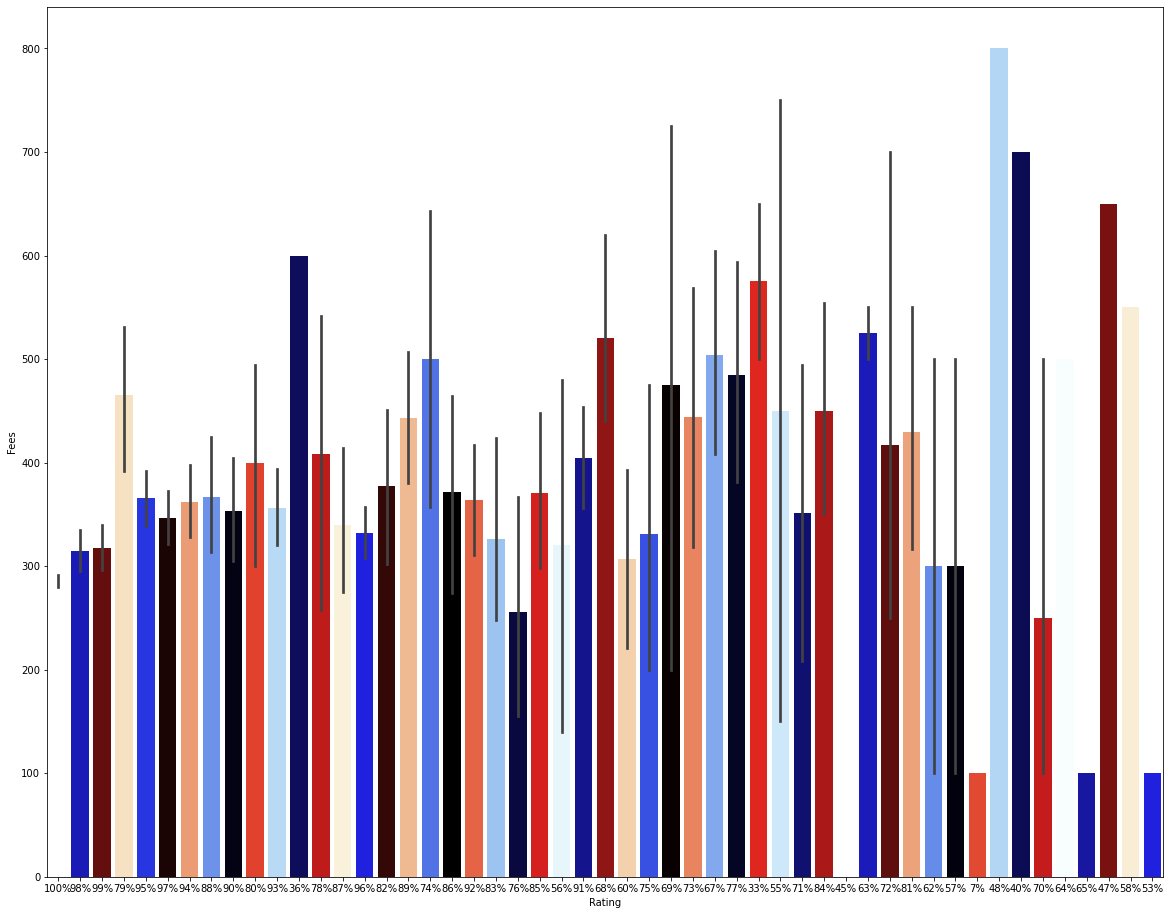

In [20]:
plt.figure(figsize=(20,16))
sns.barplot(y='Fees',x='Rating',data=train,palette='flag')

* as we can see that 48% are the maximum ratings which doctors have

<Figure size 1728x2160 with 0 Axes>

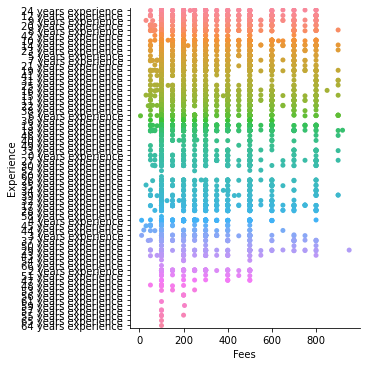

In [21]:
plt.figure(figsize=(24,30))
sns.catplot(x="Fees", y="Experience", data=train)

* Experience is very diversified

# Feature Engineering

* Numerical and One-Hot Coding of Categorical variables *

In [22]:
# Import label encoder
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
train['Qualification']= label_encoder.fit_transform(train['Qualification'])
train['Experience']= label_encoder.fit_transform(train['Experience'])
train['Rating']= label_encoder.fit_transform(train['Rating'])
train['Place']= label_encoder.fit_transform(train['Place'])
train['Profile']= label_encoder.fit_transform(train['Profile'])

train['Qualification'].unique()
train['Experience'].unique()
train['Rating'].unique()
train['Place'].unique()
train['Profile'].unique()

array([5, 0, 3, 1, 4, 2])

In [23]:
# Import label encoder
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
test['Qualification']= label_encoder.fit_transform(test['Qualification'])
test['Experience']= label_encoder.fit_transform(test['Experience'])
test['Rating']= label_encoder.fit_transform(test['Rating'])
test['Place']= label_encoder.fit_transform(test['Place'])
test['Profile']= label_encoder.fit_transform(test['Profile'])

test['Qualification'].unique()
test['Experience'].unique()
test['Rating'].unique()
test['Place'].unique()
test['Profile'].unique()

array([4, 3, 2, 0, 1, 5])

In [24]:
test

,Qualification,Experience,Rating,Place,Profile
0,241,28,0,142,4
1,340,24,0,580,3
2,258,34,9,212,2
3,6,0,0,374,0
4,79,7,0,231,1
...,...,...,...,...,...
1982,17,1,0,58,0
1983,548,33,0,96,2
1984,474,56,0,424,4
1985,51,3,34,26,1


In [25]:
test.to_csv('test.csv')

In [26]:
train

,Qualification,Experience,Rating,Place,Profile,Fees
0,401,16,0,299,5,100
1,73,3,49,866,0,350
2,1135,63,0,457,3,300
3,464,3,0,68,0,250
4,10,12,0,337,0,250
...,...,...,...,...,...,...
5956,1075,10,49,70,3,300
5957,596,26,0,541,4,100
5958,596,35,48,216,4,600
5959,943,6,41,850,4,100


# Building Model

In [27]:
train.head()

,Qualification,Experience,Rating,Place,Profile,Fees
0,401,16,0,299,5,100
1,73,3,49,866,0,350
2,1135,63,0,457,3,300
3,464,3,0,68,0,250
4,10,12,0,337,0,250


In [28]:
X= train.drop(columns = ['Fees'], axis=1)
y= train['Fees']

In [29]:
# 20% data as validation set
X_train,X_valid,y_train,y_valid = train_test_split(X,y,test_size=0.2,random_state=22)

ML models

In [30]:
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

In [31]:
algos = [LinearRegression(),  Ridge(), Lasso(),
          KNeighborsRegressor(), DecisionTreeRegressor()]

names = ['Linear Regression', 'Ridge Regression', 'Lasso Regression',
         'K Neighbors Regressor', 'Decision Tree Regressor']

rmse_list = []

In [32]:
for name in algos:
    model = name
    model.fit(X_train,y_train)
    y_pred = model.predict(X_valid)
    MSE= metrics.mean_squared_error(y_valid,y_pred)
    rmse = np.sqrt(MSE)
    rmse_list.append(rmse)

In [33]:
evaluation = pd.DataFrame({'Model': names,
                           'RMSE': rmse_list})

In [34]:
evaluation

,Model,RMSE
0,Linear Regression,182.953443
1,Ridge Regression,182.953412
2,Lasso Regression,182.934005
3,K Neighbors Regressor,191.162361
4,Decision Tree Regressor,243.910842


* As we can see Decesion tree gave the best result

In [35]:
submission = pd.read_csv('test.csv')
model = DecisionTreeRegressor()
model.fit(X, y)
final_predictions = model.predict(test)
submission['Fees'] = final_predictions
#only positive predictions for the target variable
submission['Fees'] = submission['Fees'].apply(lambda x: 0 if x<0 else x)
submission.to_csv('my_submission.csv', index=False)